In [1]:
#Importamos librerías 
#
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Montamos de google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Leemos CSV de censo
#Cada row es un County diferente
#Vamos a ver si estos condados podemos agruparlos por sus características
census=pd.read_csv('/content/drive/MyDrive/Databases/Week 18 - USL/acs2015_county_data.csv')
census.head()


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,0.0,0.0,43656,16948.0,1234.0,9102,538,48.5,56.1,30.1,21.6,24.7,9.2,14.3,89.1,7.1,0.9,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,0.0,0.0,7085,18104.0,3771.0,8821,939,39.1,58.1,18.4,38.2,18.5,15.7,9.1,69.1,17.8,1.0,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,0.0,0.0,18458,17818.0,1255.0,8420,486,54.0,68.3,23.6,21.0,21.8,13.9,19.7,82.0,11.4,0.1,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,0.1,0.0,27924,15627.0,1836.0,7960,512,52.3,62.1,25.9,25.9,20.7,12.8,14.7,86.0,7.9,0.0,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [5]:
#Describiend Dataset
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3219.000000,3219.000000,3220.000000,3220.000000,3220.000000,3219.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,6.993507e+04,46129.868903,2850.395464,23981.771739,1362.518944,17.493261,24.180801,30.990621,18.346398,22.215807,12.714099,15.733385,79.181925,10.278758,0.971832,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,2.051189e+05,12911.297940,1918.942273,6204.339960,1049.875689,8.317883,11.698329,6.368379,3.635764,3.199682,4.216784,5.736308,7.657972,2.907897,3.059019,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+01,10499.000000,270.000000,5878.000000,113.000000,1.400000,0.000000,13.500000,5.000000,4.100000,1.700000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,8.450500e+03,38191.500000,1635.000000,20238.500000,755.000000,12.100000,16.300000,26.700000,16.000000,20.200000,9.800000,11.500000,76.600000,8.400000,0.100000,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,1.964300e+04,44749.000000,2406.000000,23460.000000,1096.500000,16.150000,22.700000,29.900000,18.100000,22.400000,12.100000,15.250000,80.700000,9.900000,0.400000,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,4.992050e+04,52074.000000,3446.000000,27053.250000,1631.000000,20.700000,30.000000,34.400000,20.300000,24.400000,14.900000,19.325000,83.700000,11.800000,0.800000,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,6.046749e+06,123453.000000,21355.000000,65600.000000,15266.000000,64.200000,81.600000,74.000000,38.200000,35.400000,40.300000,55.600000,94.600000,29.900000,61.700000,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [6]:
#Revisando Nulos
census.isnull().sum(axis=0)

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [7]:
#Volando los que tengan un nulo
census=census.dropna()

In [8]:
#Seleccionando las columnas que no sean CEnsusID, State y county
#Es para ver si KMeans, a partir de las demás características es capaz de 
#Hacer llos grupos de cada Registro
cols=[c for c in census.columns.values if c not in ['CensusId', 'State', 'County']]

In [9]:
#vemos las columnas que quedaron
cols

['TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'Citizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

#KMEans
K-Mean es una de las técnicas de agrupación en clústeres de aprendizaje automático no supervisado más utilizadas. 

Es una técnica de agrupación basada en centroides que necesita que usted decida el número de agrupaciones (centroides) y coloque aleatoriamente los centroides de agrupación para comenzar el proceso de agrupación. 

El objetivo es dividir N observaciones en K grupos repetidamente hasta que no se puedan formar más grupos


Ventajas
1.   Facil de Implementar
2.   Bueno para trabajar con Datasets grandes

Desventajas

1.   No funciona bien con Outliers, tienden a jalar el centro
2.   Leno entre más dimensiones existan





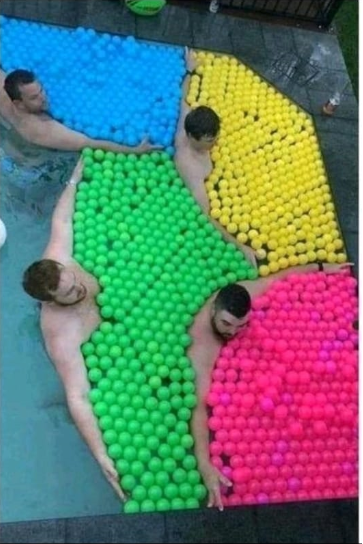

1. Decide el número de agrupaciones. Este número se llama K y el número de conglomerados es igual al número de centroides. Basado en el valor de K, genere las coordenadas para K centroides aleatorios.
2. Para cada punto, calcule la distancia euclidiana entre el punto y cada uno de los centroides.
3. Asigne el punto a su centroide más cercano. Los puntos asignados al mismo centroide forman un grupo.
4. Una vez que se forman los conglomerados, calcule el nuevo centroide para cada conglomerado tomando la media del conglomerado. La media del conglomerado es la media de las coordenadas xey de todos los puntos que pertenecen al conglomerado.
5. Repita los pasos 2, 3 y 4 hasta que los centroides no puedan moverse más. En otras palabras, repita estos pasos hasta la convergencia.

Ejemplos
* Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
* Categorización de Inventario: agrupar productos por actividad en sus ventas
* Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

In [10]:
#Importamos KMeans y le decimos que nos haga 4 clústers
from sklearn.cluster import KMeans


##Elbow Method

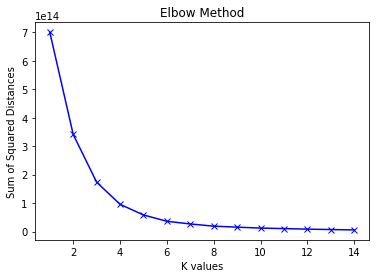

In [11]:
#Rango de valores de posibles clusters
K = range(1,15)
#suma de distancias cuadradas
sum_of_squared_distances = []
#basicamente se lecciona el Cluster cuando deja de bajar mucho nuestro K
for k in K:
    model = KMeans(n_clusters=k).fit(census[cols])
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K values")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

In [12]:
#Existen técnicas para encontrar 
kmeans = KMeans(n_clusters=4)
census_clusters = kmeans.fit(census[cols])

In [13]:
#Length de los centros que contiene nuestro kmeans
len(census_clusters.cluster_centers_)

4

In [14]:
#cantidad de Features
len(cols)

34

In [15]:
#Nos da un centro para cada Feature (34)
census_clusters.cluster_centers_

array([[4.86137678e+04, 2.40621967e+04, 2.45515711e+04, 1.05567434e+01,
        7.64794408e+01, 8.35263158e+00, 1.80161184e+00, 9.32302632e-01,
        6.60197368e-02, 3.59949480e+04, 4.52585901e+04, 2.96736349e+03,
        2.35332332e+04, 1.41598651e+03, 1.76663816e+01, 2.44105263e+01,
        3.05263158e+01, 1.83702632e+01, 2.20742434e+01, 1.29949671e+01,
        1.60345066e+01, 7.94196711e+01, 1.03449342e+01, 6.61085526e-01,
        3.34588816e+00, 1.59351974e+00, 4.63578947e+00, 2.30830263e+01,
        2.15065523e+04, 7.38485197e+01, 1.77832895e+01, 8.07098684e+00,
        2.97006579e-01, 8.08003289e+00],
       [2.59497053e+06, 1.27467168e+06, 1.32029884e+06, 3.28736842e+01,
        3.98684211e+01, 1.44368421e+01, 3.31578947e-01, 9.75789474e+00,
        1.89473684e-01, 1.65020984e+06, 5.85898947e+04, 4.97473684e+02,
        3.08353158e+04, 2.48105263e+02, 1.68368421e+01, 2.35842105e+01,
        3.71842105e+01, 1.95105263e+01, 2.45473684e+01, 8.02631579e+00,
        1.07368421e+01,

In [16]:
#Nos predice a que clúster va a pertenecer 
preds=census_clusters.fit_predict(census[cols])
len(preds)

3218

In [17]:
#Asignamos a una columna llamada cluster el label al cual pertenece según pred
census['cluster']=preds
census.cluster.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 3, 1, 2], dtype=int32)

In [18]:
#VEmos cuales pertenecen al segundo cluster
census[census.cluster==2]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
204,6037,California,Los Angeles,10038388,4945351,5093037,48.2,26.9,8.0,0.2,14.0,0.2,6046749,56196.0,270.0,28337,113,18.2,25.8,35.7,19.1,24.6,7.8,12.8,73.0,9.9,6.8,2.8,2.3,5.1,30.0,4635465,79.0,11.5,9.4,0.2,10.0,2


In [19]:
#Contar cuantos pertenecen al cluster 1 por estado
census[census.cluster==1].State.value_counts()


California    5
Texas         4
New York      3
Florida       2
Arizona       1
Illinois      1
Washington    1
Nevada        1
Michigan      1
Name: State, dtype: int64

In [20]:
#Agrupamos por cluster la media de income
census.groupby(['cluster']).Income.mean()

cluster
0    45264.092282
1    58589.894737
2    56196.000000
3    61615.901961
Name: Income, dtype: float64

In [21]:
#Agrupamos por cluster el porcentaje de pobreza infantil
census.groupby(['cluster'])['ChildPoverty'].mean()

cluster
0    24.418030
1    23.584211
2    25.800000
3    19.681046
Name: ChildPoverty, dtype: float64

In [22]:
#Contamos por cluster cuantos valores hay
census.cluster.value_counts()

0    3045
3     153
1      19
2       1
Name: cluster, dtype: int64

##Ejemplo para que sea visual

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


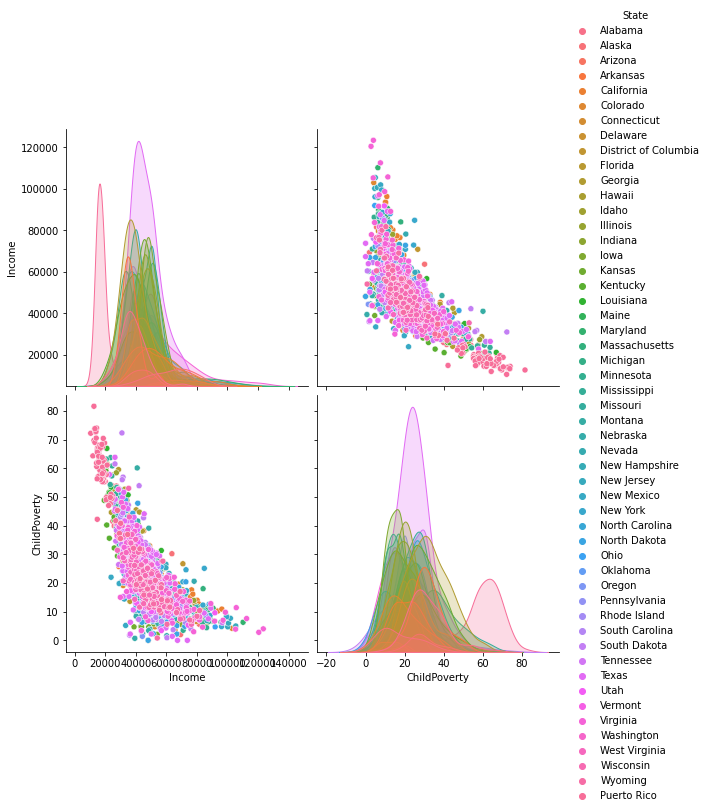

In [23]:
#Hacemos un Pairplot para ver si podemos relacionar nuestras dos variables
#y los estados
sns.pairplot(census, hue='State',size=4,vars=["Income","ChildPoverty"],kind='scatter')

In [24]:
#Sleeccionamos el top 4 por conteo y creamos un nuevo dataset
print(census.groupby('State').size().nlargest(4))


State
Texas       253
Georgia     159
Virginia    133
Kentucky    120
dtype: int64


In [25]:
# GEneramos dataset de condados de los 4 estados que más tienen estados
cols = ['Texas','Georgia','Virginia','Kentucky']
census_new = census[census.State.isin(cols)]
len(census_new)


665

In [26]:
#Aplicamos StandardScaler
#Elimina la media de neustros datos , Varianza igual a 1
# Recuerden que esto es para que el income de 100000 no tenga más peso que uno de 1000
from  sklearn.preprocessing import StandardScaler
scale=StandardScaler()
census_new['IncomeStandardScaler'] = scale.fit_transform(census_new.Income.values.reshape(-1,1))
census_new['ChildPovertyStandardScaler'] = scale.fit_transform(census_new.ChildPoverty.values.reshape(-1,1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


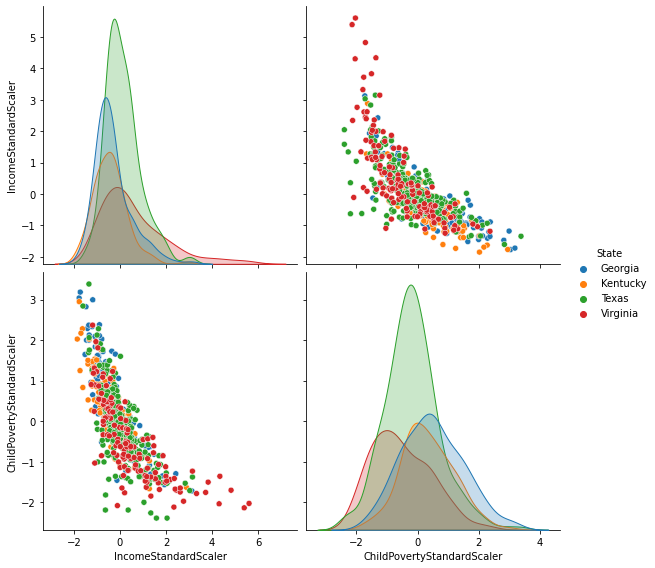

In [27]:
#Visualizamos nuevamente
sns.pairplot(census_new, hue='State',size=4,vars=["IncomeStandardScaler","ChildPovertyStandardScaler"],kind='scatter')

In [28]:
#Creamos un array de el nuevo df para usarlo con KMEans
# X = np.array(census_new[["County","IncomeStandardScaler","ChildPovertyStandardScaler"]])
# X.shape
new_df =census_new[["County","IncomeStandardScaler","ChildPovertyStandardScaler"]]

In [29]:
cols_2 = ["IncomeStandardScaler","ChildPovertyStandardScaler"]

In [30]:
#Usamos el Kmeans definido anteriormente
#con 4 clsters
kmeans_2 = kmeans.fit(new_df[cols_2])
kmeans_2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#vemos los centros de cada feature cluster
kmeans_2.cluster_centers_

array([[ 0.53680706, -0.79023765],
       [-0.96986149,  1.47947807],
       [ 2.41687297, -1.52866131],
       [-0.35102379,  0.12521348]])

In [32]:
preds_kmeans_2=census_clusters.predict(new_df[cols_2])


In [33]:
#Asignamos a una columna llamada cluster el label al cual pertenece según pred
new_df['cluster']=preds_kmeans_2
new_df.cluster.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([3, 1, 0, 2], dtype=int32)

In [34]:
new_df.head()

,County,IncomeStandardScaler,ChildPovertyStandardScaler,cluster
387,Appling,-0.577306,-0.111667,3
388,Atkinson,-1.021473,1.074658,1
389,Bacon,-0.575372,-0.383344,3
390,Baker,-0.064387,1.056546,3
391,Baldwin,-0.912114,1.445950,1


In [35]:
X = new_df[cols_2].to_numpy()

In [36]:
#generamos nuestra prediccion de X a ver a que cluster lo asigna
labels = kmeans_2.predict(X)
#guardamos los centros
center = kmeans_2.cluster_centers_
#generamos colores y los asignamos a cada prediccion
colors = ['yellow','red','blue','green']
asignar=[]
for row in labels:
    asignar.append(colors[row])

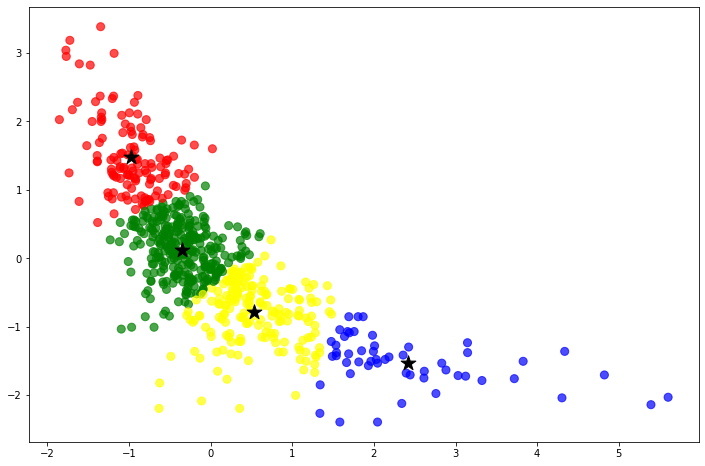

In [37]:
#Separamos nuestro income
plt.figure(figsize=(12,8)) 
feature_1 = X[:,0]
#separamos nuestro ChildPoverty
feature_2 = X[:,1]
#generamos scatter
plt.scatter(feature_1, feature_2, c=asignar,s=65,alpha=.7 )
#mostramos centro
plt.scatter(center[:,0],center[:,1],marker='*',c='black',s=240)
plt.show()

#DBSCAN


Density-based spatial clustering of applications with noise \\
https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27 \\
https://towardsdatascience.com/dbscan-with-python-743162371dca

DBSCAN hace esto midiendo la distancia entre cada punto y, si hay suficientes puntos lo suficientemente cerca, DBSCAN lo clasificará como un nuevo grupo.

Otros algoritmos de agrupación en clústeres como KMeans requieren que el usuario sepa cuántos clústeres existen en los datos.
En lugar de requerir cuántos clústeres se deben encontrar, DBSCAN requiere que el usuario ingrese la distancia máxima entre cada punto de datos que se puede considerar parte de un clúster y cuántos puntos de datos se necesitan para formar un clúster.

Descubre clusters de cualquier forma.
Muy sensible a los parametrs

DBSCAN no tiene centros.

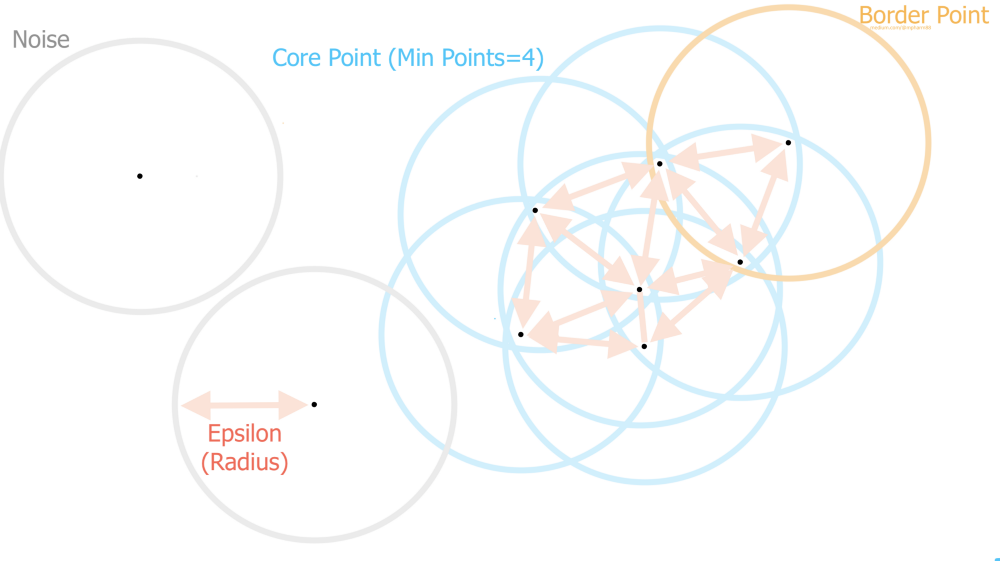

* Ruido (Noise): este es un punto que no tiene suficientes vecinos dentro de épsilon para ser parte de un clúster (incluido él mismo).
* Puntos de frontera (Border Points): este es un punto que tiene vecinos dentro de épsilon pero no suficientes vecinos para ser un punto central. Estos puntos forman el borde del grupo.
* Punto central (Core Points): puntos que tienen los puntos mínimos requeridos dentro de epsilon (incluido él mismo). Estos puntos junto con los puntos fronterizos formarán un grupo.

Ejemplos
DBSCAN se utiliza principalmente para agrupar en espacios planos.
* Se pueden lograr buenos resultados si se usa para mapear el efecto de desastres naturales o trazar la ubicación de estaciones meteorológicas en una ciudad.
* Esto también se puede utilizar cuando los datos se componen de puntos no discretos y es bueno para manejar valores atípicos.
* Los sistemas de recomendación utilizan DBSCAN para recomendar productos / programas a sus clientes.

In [38]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN



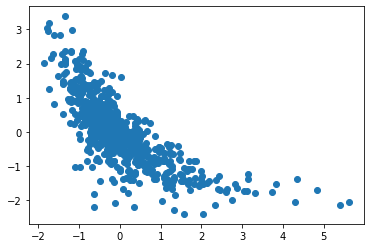

In [39]:
# Usamos array X creado anteriormente
plt.scatter(X[:,0], X[:,1])

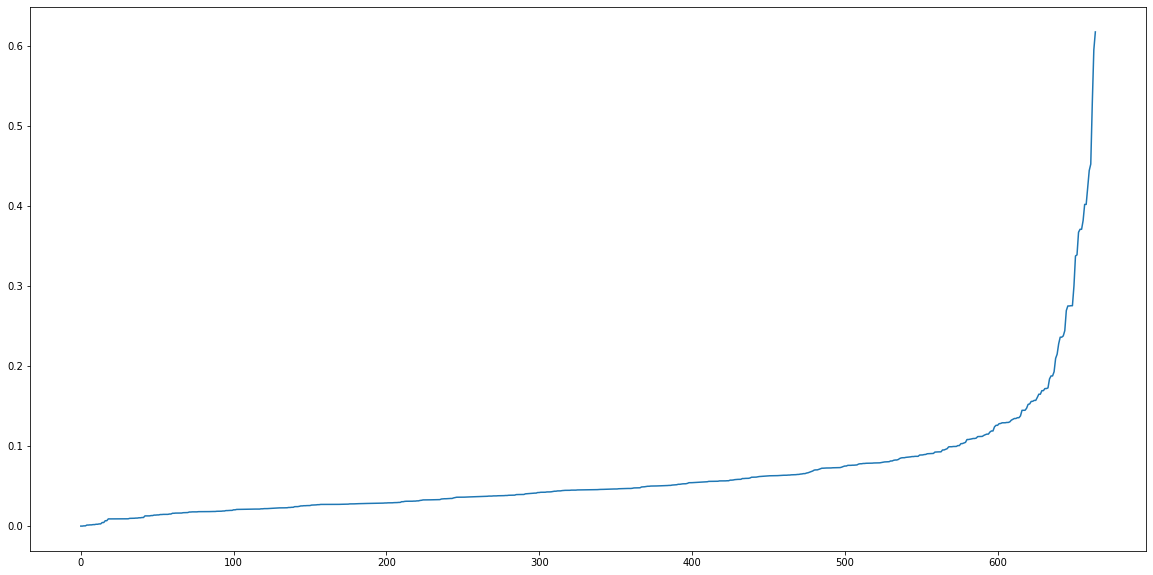

In [40]:
# Implementamos algoritmo NearestNeighbors no supervisado
# nos regresa la distancia optima donde la curva se dispara
from sklearn.neighbors import NearestNeighbors
# ‘ball_tree’ usará algoritmo BallTree
# ‘kd_tree’ usará algoritmo KDTree
# ‘brute’ usará brute-force search.
# ‘auto’ intentará elegir el algoritmo más apropiado basado en los valores pasados
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X)
# Regresa la distancia
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
plt.figure(figsize=(20,10)) 
plt.plot(distances)
plt.show()

In [41]:
# Epsilon — The maximum distance a point can be from another point to be considered a neighbor.
# Min_Points — The amount of points needed within the range of epsilon to be considered a cluster.
#https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

# Entre sea un dataser mas grande, mas MinSamples deberemos usar
#Si tiene mucho "ruido", elegir un numero mayor
#Generally, MinPts should be greater than or equal to the dimensionality of the data set
#For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
#If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).
# ·para este caso tenemos 2 dimensiones entonces usaremos 4 samples
m = DBSCAN(eps=.15, min_samples=4)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [42]:
# label=-1 means the point is an outlier. Rest of the values
#  represent the label/cluster number starting from 0
labels = m.labels_

In [43]:
# label=-1 means the point is an outlier. Rest of the values
#  represent the label/cluster number starting from 0
labels

array([ 0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  3,  0,  1,
        0, -1,  0,  1,  0,  0,  0,  0, -1,  0,  2,  0, -1,  0, -1, -1,  0,
        0,  6,  0,  3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  1, -1,  3,  0,
        0,  4,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  4, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  5,
        0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  4, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  7,  0,  0,  0,
        0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,
        0,  0, -1, -1,  0

In [60]:
#Asignamos a una columna llamada cluster el label al cual pertenece según pred
new_df['cluster_hdbscan']=labels
new_df.cluster_hdbscan.unique()
# Imprimimos df
new_df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,IncomeStandardScaler,ChildPovertyStandardScaler,cluster,cluster_hdbscan
2948,Suffolk city,1.454032,-0.781805,0,-1
2949,Virginia Beach city,1.535317,-1.270824,2,7
2950,Waynesboro city,0.032009,0.060395,3,0
2951,Williamsburg city,0.246573,-0.555407,0,0
2952,Winchester city,0.011957,-0.627854,0,0


In [46]:
#Vamos a mostrar tdos los que no sean 0 como False, los demás True
labels_mask_general = np.zeros_like(labels, dtype=bool)

In [47]:
#Colocamos todos los puntos que no son -1 como verdaderos
labels_mask_general[m.core_sample_indices_] = True


In [48]:
#Nos dice cuantos labels deberíamos de usar según DBSCAN
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#Cuantos "ruidos" hay en mis etiquetas
n_noise_ = list(labels).count(-1)

In [49]:
#Ruido que tenemos
n_noise_

102

In [50]:
#Clusters
n_clusters_

8

In [51]:
#setemamos colores
#Putting labels to unique_labels
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))



In [52]:
#ToCheck iteraciones
#X[labels==0 & labels_mask_general]
# X[labels==0 & ~labels_mask_general]

In [53]:
#ToCheckLabel
#labels

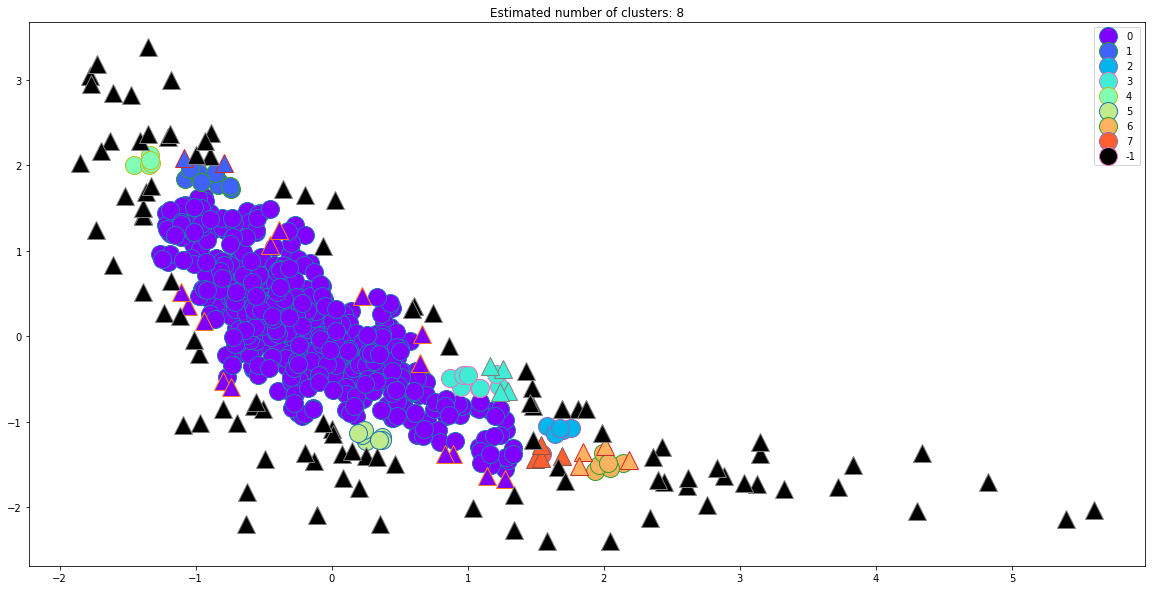

In [54]:
plt.figure(figsize=(20,10)) 
#iterando entre cada label y color
for k, col in zip(unique_labels, colors):
  #Si se considera outliers, fijamos color negro
    if k == -1:
        col = "k"
    
    #Me trae true false donde la etiqueta corresponda a la iteración
    clase = (labels == k)
    #Trae el valor de posicion de Income y ChildPOverty donde clase y labels_mask
    # general coincidan
    xy = X[clase & labels_mask_general]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col, markersize=18, label=k,alpha=1)
    #Aquellos valores que son frontera de un cluster
    xy = X[clase & ~labels_mask_general]
    plt.plot(xy[:, 0], xy[:, 1], "^", markerfacecolor=col, markersize=18,alpha=1)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.legend()
plt.show()

